In [23]:
import pricey as pr
import yfinance as yf
from sklearn.decomposition import PCA, KernelPCA, FastICA
%matplotlib inline

In [24]:
assets = {
    'ACWI':      'ACWI',        # 주식시장
    'SPY':       'SPX',         # 미국주식
    'QQQ':       'NASDAQ',      # 미국나스닥
    '102110.KS': 'KSP2',        # 한국주식
    'EWJ':       'JP',          # 일본주식
    'MCHI':      'CN',          # 중국주식
    'IEV':       'EU',          # 유럽주식
    'INDA':      'INDIA',       # 인도주식
    'EFA':       'DEVELOPED',   # 선진국주식
    'EEM':       'EM',          # 이머징주식
    'AAXJ':      'AAXJ',        # 아시아(일본제외)
    'BKF':       'BRIC',        # 브릭스
    'FM':        'FRONTIER',    # 프론티어
    'ILF':       'LATAM',       # 남미
    'GULF':      'MIDEAST',     # 중동아시아
    'GWX':       'SMALLCAP',    # 글로벌중소형주(미국제외)
    
    'AGG':       'USAGG',       # 미국종합채
    'SHY':       'UST-SHORT',   # 미국단기채
    'IEF':       'UST-MID',     # 미국중기채
    'TLT':       'UST-LONG',    # 미국장기채
    'TIP':       'USTIP',       # 미국물가채
    'LQD':       'USIG',        # 미국투자등급채
    'HYG':       'USHY',        # 미국하이일드
    'MBB':       'USMBS',       # 미국MBS
    'BKLN':      'USBKLN',      # 미국뱅크론
    'CWB':       'USCB',        # 미국CB
    'PFF':       'USPFF',       # 미국우선주
    'EMB':       'EMB',         # 이머징채권
    '148070.KS': 'KTB-MID',     # 한국중기채
    
    'DBC':       'COMDTY',      # 원자재
    'USO':       'WTI',         # WTI
    'GLD':       'GOLD',        # 금
    'SLV':       'SILVER',      # 은
    'DBA':       'AGRI',        # 농산물
    'UNG':       'GAS',         # 천연가스
    'DBE':       'ENERGY',      # 에너지
    'DBB':       'BASEMETAL',   # 철강
    'GLTR':      'PRECMETAL',   # 귀금속
    
    'UUP':       'USD',         # 달러
    'FXY':       'JPY',         # 엔화
    'FXE':       'EUR',         # 유로화
    'FXA':       'AUD',         # 호주달러 
    'KRW=X':     'USDKRW',      # 원달러
    
    'VNQ':       'US-REIT',     # 미국리츠
    'REM':       'US-MREIT',    # 미국모기지리츠
    
    '^VIX':       'VIX',         # 변동성
}

In [26]:
symbols = ' '.join(assets.keys())
start = '2015-12-31'
end = '2025-08-19'
db = yf.download(symbols, start=start, end=end, threads=True)['Close']
db = db.rename(columns=assets).ffill()

C:\Users\USER\AppData\Local\Temp\ipykernel_17544\1163049415.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  db = yf.download(symbols, start=start, end=end, threads=True)['Close']
[*********************100%***********************]  46 of 46 completed


In [35]:
db

Ticker,KSP2,KTB-MID,AAXJ,ACWI,USAGG,BRIC,USBKLN,USCB,AGRI,BASEMETAL,...,UST-SHORT,SILVER,SPX,USTIP,UST-LONG,GAS,WTI,USD,US-REIT,VIX
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,NaN,NaN,44.841663,46.480320,83.493492,24.448410,13.478262,32.058659,18.355145,10.107574,...,71.015518,13.190000,173.778702,83.729424,93.743416,138.720001,88.000000,22.159843,54.601906,18.209999
2016-01-01,NaN,NaN,44.841663,46.480320,83.493492,24.448410,13.478262,32.058659,18.355145,10.107574,...,71.015518,13.190000,173.778702,83.729424,93.743416,138.720001,88.000000,22.159843,54.601906,18.209999
2016-01-04,19176.501953,101154.632812,43.531929,45.655972,83.462524,23.696669,13.484276,31.769779,18.177025,9.860839,...,71.108147,13.190000,171.349335,84.057671,94.419815,136.479996,87.839996,22.194403,53.944473,20.700001
2016-01-05,19297.035156,100785.117188,43.615894,45.697605,83.501213,23.763493,13.454186,31.814243,18.061251,9.877856,...,71.066032,13.310000,171.639206,84.004234,94.038872,138.240005,85.279999,22.323992,54.985413,19.340000
2016-01-06,19176.501953,100944.085938,42.767921,45.006470,83.818123,23.362558,13.430119,31.666069,17.936563,9.792776,...,71.108147,13.360000,169.474060,84.271400,95.306107,135.520004,80.879997,22.263515,54.834743,20.590000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-12,43310.000000,116885.000000,85.900002,132.949997,99.010002,42.040001,20.836941,85.279999,26.809999,19.719999,...,82.680000,34.410000,642.690002,110.160004,86.949997,12.280000,72.949997,27.400000,88.970001,14.730000
2025-08-13,43795.000000,116800.000000,87.120003,133.559998,99.370003,42.810001,20.846882,85.660004,26.900000,19.559999,...,82.790001,35.000000,644.890015,110.580002,87.669998,12.400000,72.459999,27.330000,89.800003,14.490000
2025-08-14,43750.000000,117020.000000,85.889999,133.350006,99.089996,42.110001,20.836941,85.309998,26.600000,19.750000,...,82.699997,34.500000,644.950012,110.250000,87.019997,12.510000,73.739998,27.430000,89.160004,14.830000


In [28]:
db_ = db.loc[:].iloc[-250*5:]
reducer = FastICA(n_components=3, random_state=0)
# pricer = Pricer(db_, reducer=KernelPCA(n_components=3, kernel='linear', fit_inverse_transform=True))
pricer = pr.Pricer(db_, reducer=reducer, prob=0.8, howfar=250)

09:16:56 - cmdstanpy - INFO - Chain [1] start processing
09:16:56 - cmdstanpy - INFO - Chain [1] done processing
09:16:57 - cmdstanpy - INFO - Chain [1] start processing
09:16:57 - cmdstanpy - INFO - Chain [1] done processing
09:16:57 - cmdstanpy - INFO - Chain [1] start processing
09:16:57 - cmdstanpy - INFO - Chain [1] done processing


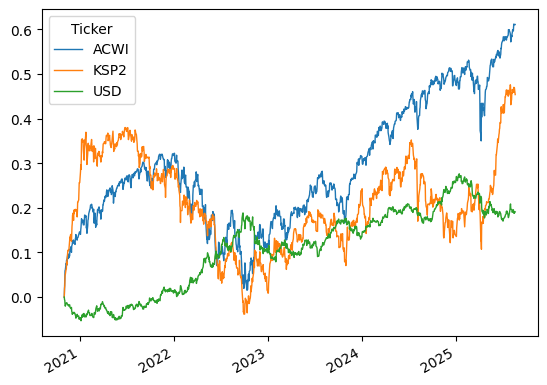

In [29]:
pricer.plot_p(symbols=['ACWI','KSP2','USD'], lw=1)

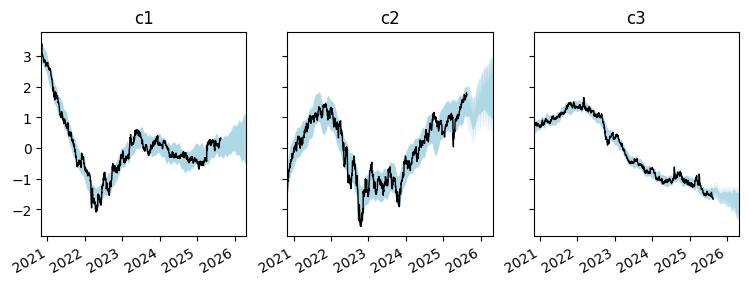

In [30]:
pricer.plot_comp_forecast()

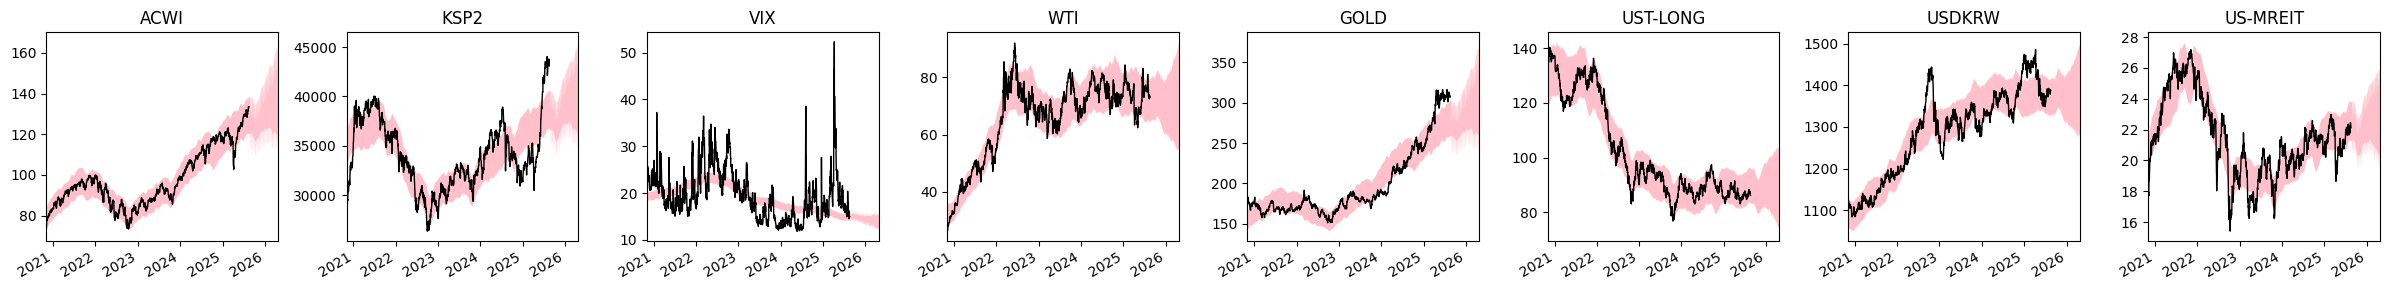

In [31]:
pricer.plot_p_forecast('ACWI','KSP2','VIX','WTI','GOLD','UST-LONG','USDKRW','US-MREIT')

C:\ProgramData\anaconda3\envs\pricey\lib\site-packages\scipy\stats\_distn_infrastructure.py:2304: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\ProgramData\anaconda3\envs\pricey\lib\site-packages\scipy\stats\_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
C:\ProgramData\anaconda3\envs\pricey\lib\site-packages\scipy\stats\_distn_infrastructure.py:2212: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
C:\Users\USER\Documents\GitHub\pricey\pricey\api.py:180: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['{:,.0%}'.format(x) for x in axes[0].get_xticks()]);
C:\Users\USER\Documents\GitHub\pricey\pricey\api.py:185: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using

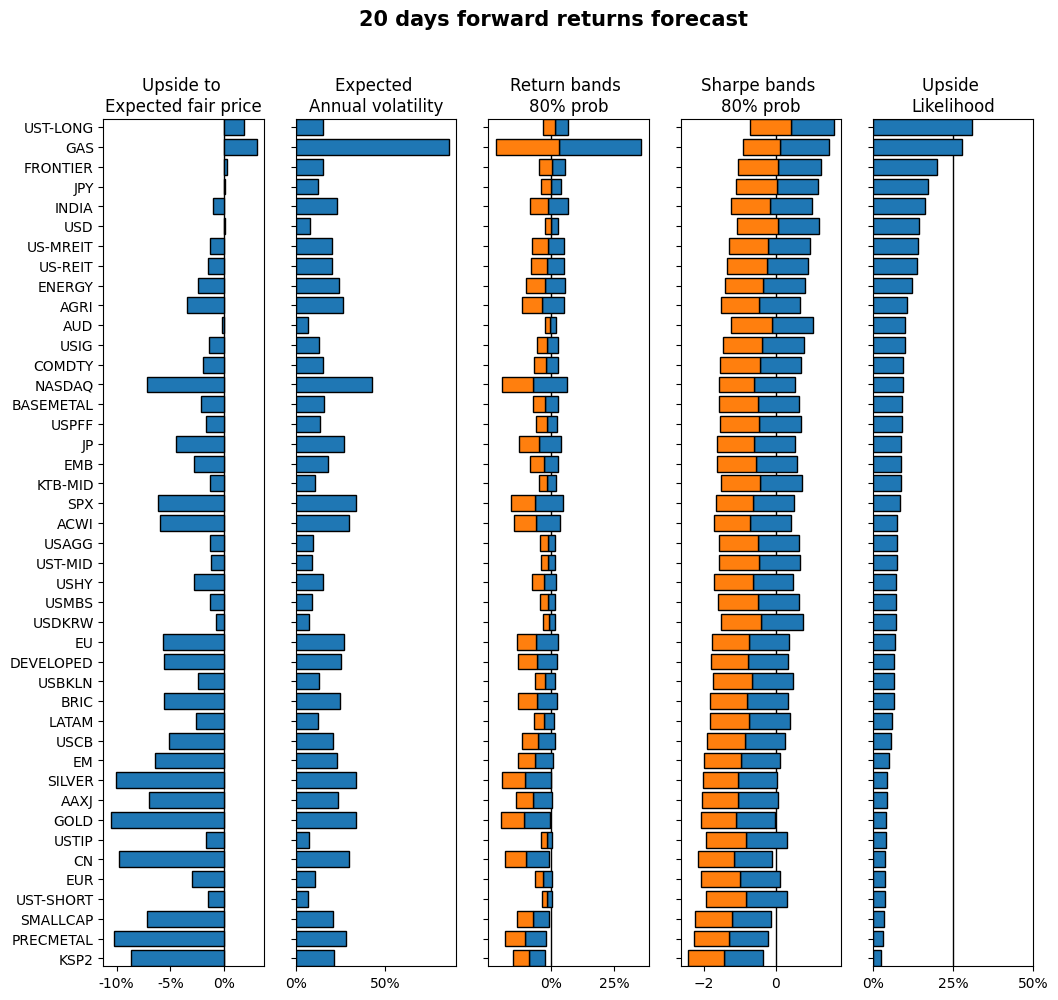

In [32]:
pricer.plot_stats(nfwd=20, up_thres=0.01, sortby='up_prob', excludes=['VIX','WTI'])

In [33]:
pricer.stats(nfwd=20, up_thres=0.01)

C:\ProgramData\anaconda3\envs\pricey\lib\site-packages\scipy\stats\_distn_infrastructure.py:2304: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\ProgramData\anaconda3\envs\pricey\lib\site-packages\scipy\stats\_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
C:\ProgramData\anaconda3\envs\pricey\lib\site-packages\scipy\stats\_distn_infrastructure.py:2212: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


,rband_fair,rband_min,rband_max,std,shband_min,shband_fair,shband_max,up_prob
Ticker,,,,,,,,
KSP2,-0.086451,-0.147028,-0.021572,0.213150,-2.438762,-1.433966,-0.357811,0.047420
KTB-MID,-0.013316,-0.047468,0.022061,0.109438,-1.533525,-0.430182,0.712721,0.171618
AAXJ,-0.070123,-0.138624,0.003825,0.237726,-2.061663,-1.042897,0.056885,0.087807
ACWI,-0.060040,-0.146235,0.034856,0.298801,-1.730305,-0.710421,0.412427,0.150079
USAGG,-0.012864,-0.042277,0.017452,0.093975,-1.590565,-0.483982,0.656586,0.147474
BRIC,-0.055970,-0.128754,0.022894,0.249260,-1.826266,-0.793887,0.324736,0.128849
USBKLN,-0.024215,-0.063825,0.017071,0.128740,-1.752807,-0.665015,0.468802,0.130867
USCB,-0.050835,-0.112522,0.015140,0.208765,-1.905608,-0.860910,0.256403,0.112793
AGRI,-0.034698,-0.113058,0.050585,0.263016,-1.519760,-0.466421,0.679979,0.211277
